In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
--2019-01-06 05:36:36--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.222, 91.189.89.223
Connecting to launchpad.net (launchpad.net)|91.189.89.222|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-01-06 05:36:37 ERROR 404: Not Found.

dpkg: error: cannot access archive 'google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb':

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
!pip install tensorboardcolab

In [0]:
data = pd.read_csv('drive/datasets/air pollution/SO2.csv')

In [6]:
data.head()

,4 hourly value of SO,4 hourly value of SO.1,4 hourly value of SO.2,4 hourly value of SO.3,4 hourly value of SO.4,4 hourly value of SO.5
0,4.1,4.7,5.0,5.2,4.1,4.7
1,4.5,5.2,5.6,5.3,4.7,5.0
2,5.8,8.3,5.6,5.3,5.2,4.8
3,4.2,4.9,4.6,6.4,4.2,4.7
4,4.4,5.0,5.2,5.5,4.4,5.0


In [7]:
data = data.values
data

array([[4.1, 4.7, 5. , 5.2, 4.1, 4.7],
       [4.5, 5.2, 5.6, 5.3, 4.7, 5. ],
       [5.8, 8.3, 5.6, 5.3, 5.2, 4.8],
       ...,
       [6.3, 6.5, 6.5, 7.2, 5.8, 5.1],
       [6.4, 7.9, 7.8, 7.9, 5.1, 5.1],
       [6.3, 6.5, 7.1, 7.8, 5.7, 5.1]])

In [0]:
data = data.astype(np.float32)

In [0]:
scaled = MinMaxScaler(feature_range=(0,10))


In [0]:
training_sc = scaled.fit_transform(data)


In [11]:
training_sc.shape

(521, 6)

In [0]:
train = training_sc[:420,:].reshape(-1)

In [13]:
train

array([0.16393423, 0.8536582 , 0.84745765, ..., 1.9402984 , 0.84821427,
       0.6403941 ], dtype=float32)

In [0]:
test = training_sc[420:,:].reshape(-1)

In [15]:
test

array([2.95082   , 1.7073174 , 2.79661   , 2.5373135 , 1.3839284 ,
       0.34482753, 1.9672127 , 2.4390244 , 2.7118642 , 1.8905474 ,
       0.8035716 , 0.39408886, 1.1475406 , 2.5609756 , 1.694915  ,
       1.6417912 , 0.6250001 , 0.09852207, 3.1147537 , 5.4878054 ,
       3.3050845 , 1.6417912 , 0.8928572 , 0.39408886, 4.09836   ,
       4.02439   , 2.79661   , 2.288557  , 1.1607143 , 0.6896552 ,
       3.2786884 , 3.4146347 , 1.7796609 , 2.288557  , 0.6250001 ,
       0.39408886, 2.1311474 , 0.609756  , 1.7796609 , 1.6417912 ,
       0.84821427, 0.34482753, 2.1311474 , 3.2926826 , 2.3728812 ,
       1.8905474 , 0.8928572 , 0.6403941 , 2.295082  , 3.2926826 ,
       1.7796609 , 1.9900497 , 0.6250001 , 0.39408886, 3.2786884 ,
       4.1463413 , 2.3728812 , 1.6915423 , 0.8928572 , 0.09852207,
       3.2786884 , 4.1463413 , 2.881356  , 1.9900497 , 0.8928572 ,
       0.44334972, 4.262295  , 4.878049  , 2.3728812 , 1.9900497 ,
       1.1607143 , 0.98522174, 4.262295  , 4.878049  , 3.38983

In [0]:
xtr = []
ytr = []
for i in range(3,2520):
  xtr.append(train[i-3:i])
  ytr.append(train[i])
  
xtr,ytr = np.array(xtr),np.array(ytr)
  

In [0]:
xtr = np.reshape(xtr,(xtr.shape[0],xtr.shape[1],1))

In [18]:
xtr.shape

(2517, 3, 1)

In [19]:
model = Sequential()
model.add(LSTM(50,input_shape=(xtr.shape[1],1),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-01-06 05:40:08--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.22.34.127, 52.22.145.207, 52.4.95.48, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.22.34.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  21.0MB/s    in 0.2s    

2019-01-06 05:40:08 (21.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [23]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://ece9f0b6.ngrok.io


In [0]:
from keras.callbacks import TensorBoard
tbc = TensorBoard(log_dir='./log',
                         write_graph=True,
                         write_grads=True,
                         batch_size=4,
                         write_images=True)

In [25]:
model.compile(loss='mean_absolute_error',optimizer='adam')
model.fit(xtr,ytr,epochs=200,batch_size=4,callbacks=[tbc],validation_split=0.2)

Train on 2013 samples, validate on 504 samples
Epoch 1/200
2013/2013 [==============================] - 20s 10ms/step - loss: 1.0171 - val_loss: 0.9289
Epoch 2/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.8088 - val_loss: 0.8102
Epoch 3/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7712 - val_loss: 0.7726
Epoch 4/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7613 - val_loss: 0.8112
Epoch 5/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7572 - val_loss: 0.7682
Epoch 6/200
2013/2013 [==============================] - 19s 9ms/step - loss: 0.7571 - val_loss: 0.7831
Epoch 7/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7486 - val_loss: 0.7792
Epoch 8/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7537 - val_loss: 0.7632
Epoch 9/200
2013/2013 [==============================] - 18s 9ms/step - loss: 0.7480 - val_loss: 0.7860
Epoch 10/200
201

In [26]:
test.shape

(606,)

In [0]:
xts = []
yts = []
for i in range(3,606):
  xts.append(test[i-3:i])
  yts.append(test[i])
xts,yts = np.array(xts),np.array(yts)

In [28]:
xts = np.reshape(xts,(xts.shape[0],xts.shape[1],1))
xts.shape

(603, 3, 1)

In [29]:
y = model.predict(xts)
y

array([[ 3.57704210e+00],
       [ 1.88237655e+00],
       [ 6.33055806e-01],
       [ 5.34852087e-01],
       [ 2.35103416e+00],
       [ 1.49629200e+00],
       [ 1.78146720e+00],
       [ 1.09015393e+00],
       [ 6.55643523e-01],
       [ 7.79810786e-01],
       [ 2.29754019e+00],
       [ 1.74881113e+00],
       [ 1.30343556e+00],
       [ 1.49914098e+00],
       [ 6.20076239e-01],
       [ 2.14896381e-01],
       [ 1.83694434e+00],
       [ 1.69665170e+00],
       [ 2.93974018e+00],
       [ 1.20232129e+00],
       [ 5.98561585e-01],
       [ 5.66585064e-01],
       [ 4.70435095e+00],
       [ 2.81127787e+00],
       [ 1.65231848e+00],
       [ 1.35484672e+00],
       [ 6.52257025e-01],
       [ 1.89673400e+00],
       [ 4.35125256e+00],
       [ 2.59426737e+00],
       [ 1.15515494e+00],
       [ 1.67174518e+00],
       [ 8.58497381e-01],
       [ 1.77910244e+00],
       [ 8.16428244e-01],
       [ 3.79774272e-01],
       [ 8.36797178e-01],
       [ 1.10853887e+00],
       [ 7.2

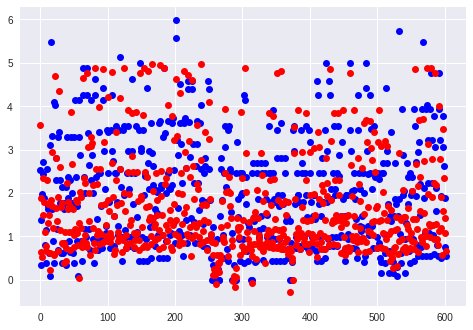

In [30]:
#y = np.squeeze(y,axis=1)
plt.plot(yts,'bo')
plt.plot(y,'ro')
plt.show()